In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [8]:
df.fillna(value=0, inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df['director'].fillna('Unknown', inplace=True)


/tmp/ipython-input-11-3977420098.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)


In [12]:
df['cast'].fillna('Unknown', inplace=True)


/tmp/ipython-input-12-1977798417.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].fillna('Unknown', inplace=True)


In [13]:
df['country'].fillna('Unknown', inplace=True)


/tmp/ipython-input-13-4158059470.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)


In [15]:
# Remove rows where 'date_added' is '0'
df = df[df['date_added'] != '0']

# Convert 'date_added' to datetime objects, coercing errors to NaT
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Now fill missing values (optional)
df['date_added'].fillna(method='ffill', inplace=True) # or fill with mode/mean

/tmp/ipython-input-15-650163551.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date_added'].fillna(method='ffill', inplace=True) # or fill with mode/mean
/tmp/ipython-input-15-650163551.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['date_added'].fillna(method='ffill', inplace=True) # or fill with mode/mean


In [16]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In [17]:
# Fill missing with '0 Unknown'
df['duration'].fillna('0 Unknown', inplace=True)

# Split into two columns
df[['duration_int', 'duration_type']] = df['duration'].str.extract('(\d+)\s*(\D+)')
df['duration_int'] = pd.to_numeric(df['duration_int'])  # Convert to int


/tmp/ipython-input-17-4276407654.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].fillna('0 Unknown', inplace=True)


In [18]:
df.drop_duplicates(inplace=True)


In [19]:
df.dtypes


,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object


/tmp/ipython-input-20-529955095.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


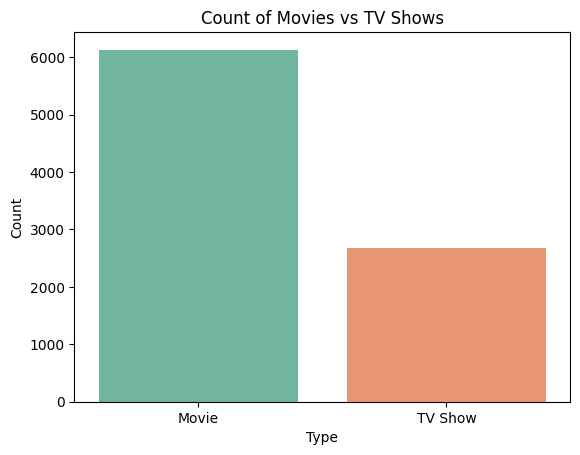

In [20]:

sns.countplot(data=df, x='type', palette='Set2')
plt.title("Count of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

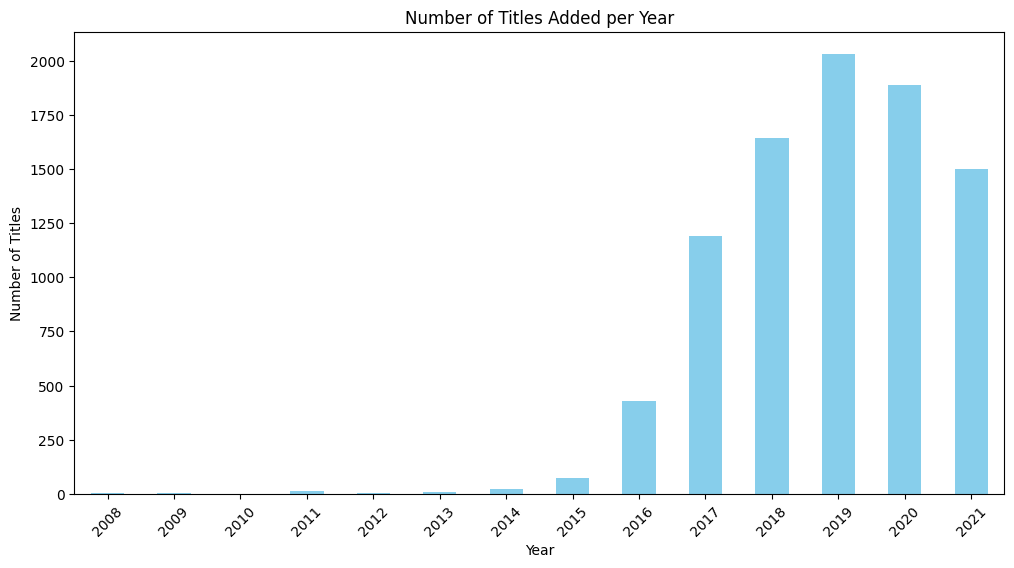

In [21]:
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title("Number of Titles Added per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-22-1276625681.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')


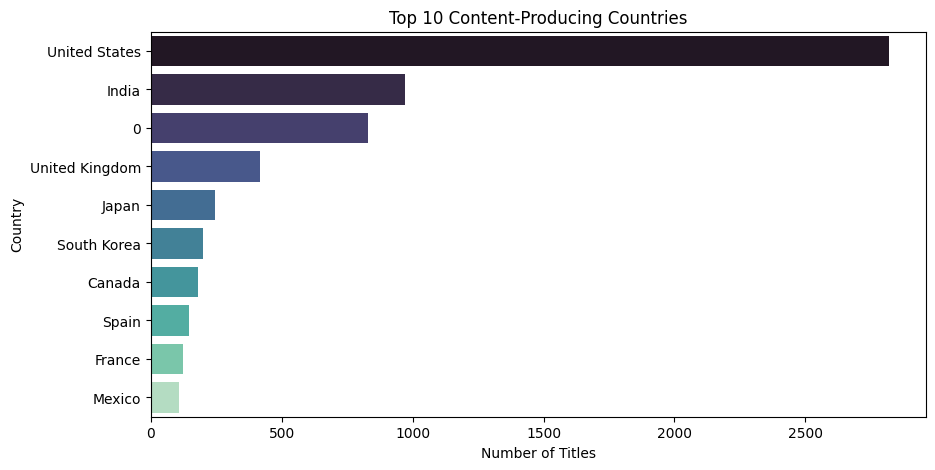

In [22]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')
plt.title("Top 10 Content-Producing Countries")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


/tmp/ipython-input-23-2559379171.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genres_df, y='Genre', x='Count', palette='viridis')


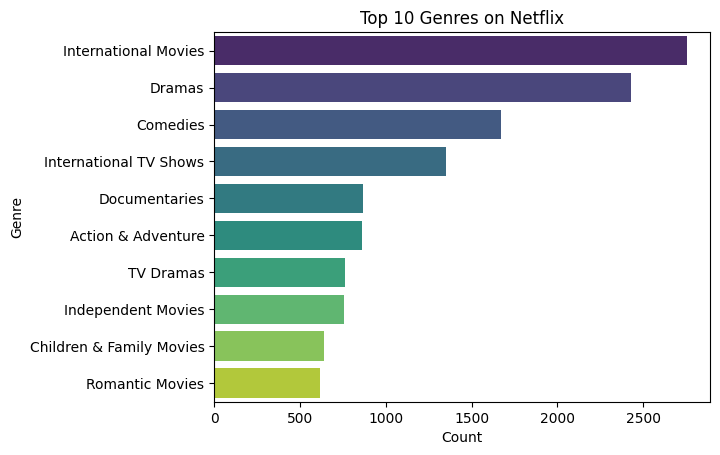

In [23]:
from collections import Counter

# Split genres and flatten
genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in genres for genre in sublist]

# Count top 10
top_genres = Counter(flat_genres).most_common(10)

# Plot
genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])
sns.barplot(data=genres_df, y='Genre', x='Count', palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.show()


/tmp/ipython-input-24-3941965686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')


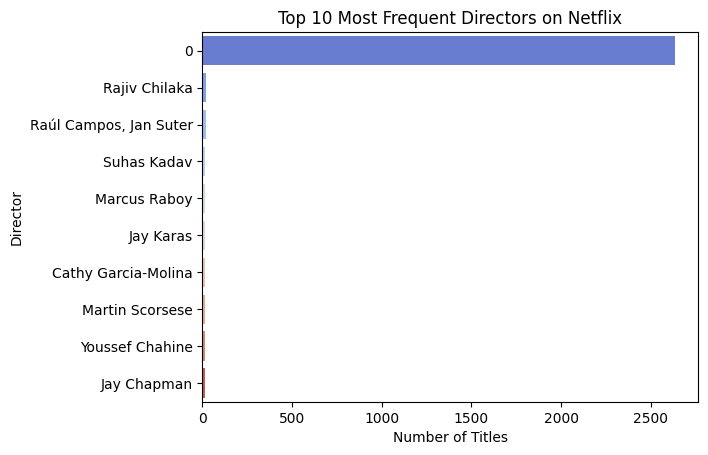

In [24]:
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)

sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')
plt.title("Top 10 Most Frequent Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


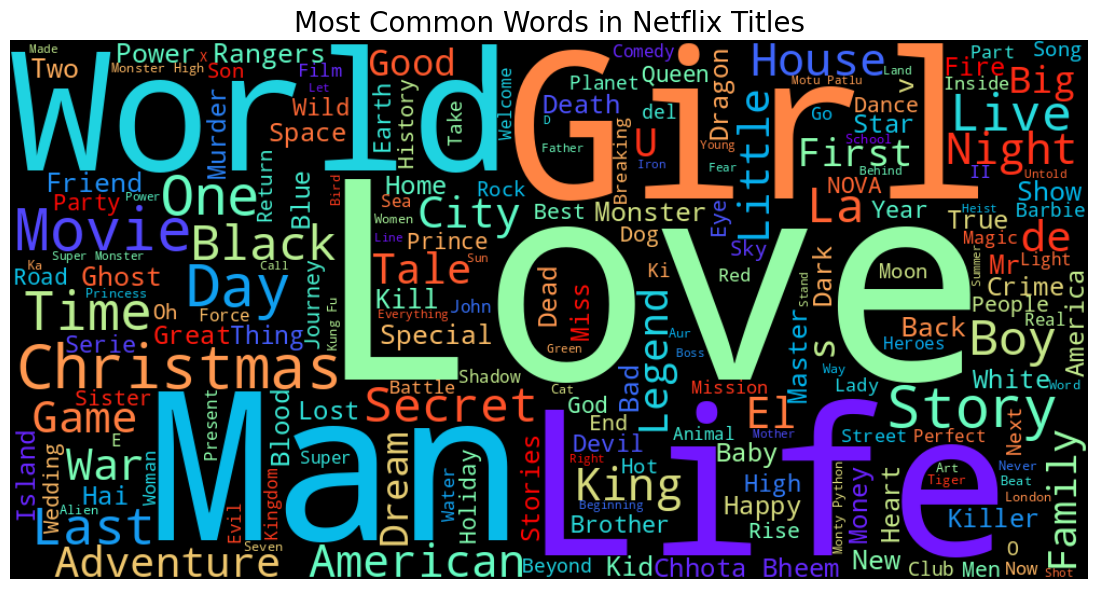

In [25]:
from wordcloud import WordCloud

text = ' '.join(df['title'].dropna())

wc = WordCloud(width=1000, height=500, background_color='black', colormap='rainbow').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Netflix Titles", fontsize=20)
plt.show()


In [26]:
df['description'].fillna('', inplace=True)
df['listed_in'].fillna('', inplace=True)

df['combined'] = df['title'] + ' ' + df['listed_in'] + ' ' + df['description']


/tmp/ipython-input-26-1582549754.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna('', inplace=True)
/tmp/ipython-input-26-1582549754.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined'])


In [28]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [29]:
# Convert all titles to lowercase for matching
df['title'] = df['title'].str.lower()

# Create reverse mapping: title → index
indices = pd.Series(df.index, index=df['title']).drop_duplicates()


In [30]:
def get_recommendations(title, cosine_sim=cosine_sim):
    title = title.lower()

    if title not in indices:
        return "Sorry, this title is not in the dataset."

    idx = indices[title]

    # Pair (index, similarity score)
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort based on similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Top 5 excluding itself
    sim_scores = sim_scores[1:6]

    # Get corresponding indices
    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices].str.title()


In [31]:
get_recommendations('Sherlock')


,title
3524,Top Boy
1166,The Irregulars
6426,Case Closed
5716,Paranoid
1991,Criminal: Uk


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
print("📌 Logistic Regression Result:")
print(classification_report(y_test, y_pred, target_names=['Movie', 'TV Show']))

📌 Logistic Regression Result:
              precision    recall  f1-score   support

       Movie       0.98      1.00      0.99      1214
     TV Show       1.00      0.95      0.97       548

    accuracy                           0.98      1762
   macro avg       0.99      0.97      0.98      1762
weighted avg       0.98      0.98      0.98      1762



In [38]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:

print("📌 Decision Tree Result:")
print(classification_report(y_test, y_pred, target_names=['Movie', 'TV Show']))

📌 Decision Tree Result:
              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1214
     TV Show       0.99      0.99      0.99       548

    accuracy                           0.99      1762
   macro avg       0.99      0.99      0.99      1762
weighted avg       0.99      0.99      0.99      1762



In [42]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
print("📌 KNN Result:")
print(classification_report(y_test, y_pred, target_names=['Movie', 'TV Show']))

📌 KNN Result:
              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1214
     TV Show       0.99      0.99      0.99       548

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



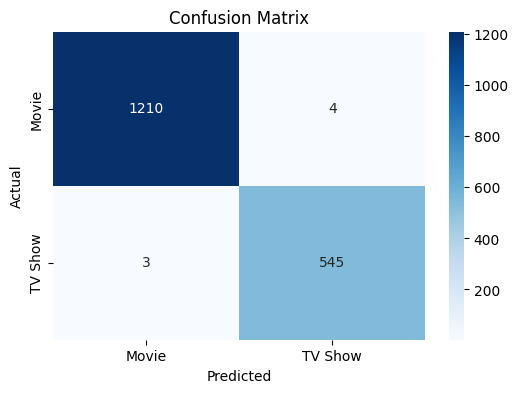

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have y_test and y_pred from any classifier
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [45]:
from sklearn.metrics import classification_report

# Text output (already used before)
print(classification_report(y_test, y_pred, target_names=['Movie', 'TV Show']))


              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1214
     TV Show       0.99      0.99      0.99       548

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



/tmp/ipython-input-46-847684528.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='Set2')


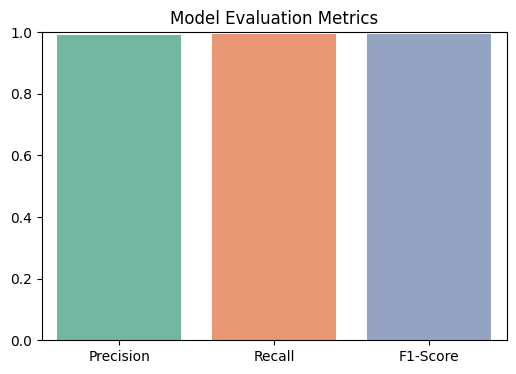

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {'Precision': precision, 'Recall': recall, 'F1-Score': f1}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='Set2')
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics')
plt.show()


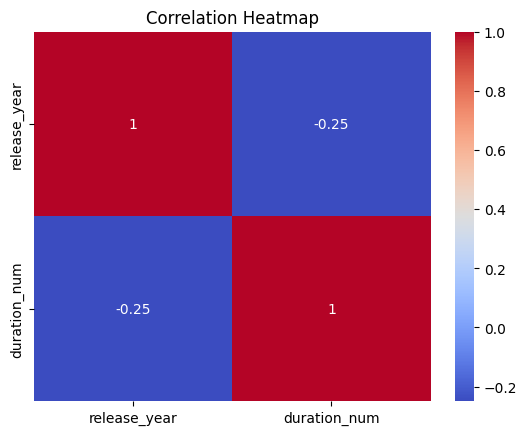

In [47]:
numeric_df = df[['release_year']].copy()
numeric_df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [51]:
import pickle

with open('netflix_rf_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save TF-IDF vectorizer too
with open('netflix_tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("✅ Model and vectorizer saved successfully.")

✅ Model and vectorizer saved successfully.
